#  Curve fitting and the $\chi^2$ error surface

The data for this problem is available at www.eg.bucknell.edu/~phys310/hw/fitting_4/fit_4.dat  Each 
line in the data file contains a value of $x_i$, $y_i$, and $u_i$, where $u_i$ is the uncertainty in $y$.

+ (a) Make a plot (with errorbars) of the data in `fit_4.dat`
+ (b) Fit a Lorentzian function of the form 
$$ y(x) = a \left(\frac{c^2}{(x-b)^2 + c^2}\right) + d$$
to the data, and plot your best fit with the data.
+ (c) Write the best-fit values for $a$, $b$, $c$, and $d$.
+ (d) Comment on the quality of the fit.
+ (e) Make a contour plot of $\chi^2 - \chi^2_{min}$ as a function of $a$ and $b$ in the vicinity of $\chi^2_\text{min}$. Does this contour plot show uncertainties in $a$ and $b$ that are consistent with what the fitting program determined?
+ (f)  Make a contour plot of $\chi^2 - \chi^2_{min}$ as a function of $c$ and $d$ in the vicinity of $\chi^2_\text{min}$. Does this contour plot show uncertainties in $c$ and $d$ that are consistent with what the fitting program determined?


#### Imports

In [1]:
import numpy as np
from scipy import optimize

import urllib   # for importing from a URL

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Following is an Ipython magic command that puts figures in notebook.
# make pdf-file with matplotlib inline  and for jupyter notebook use matplotlib notebook
%matplotlib notebook
        
# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
plt.style.use('classic')
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot params for new size

#### Define lorentzian function

<b>NOTE:</b> This function is <i>not</i> linear in the fit parameters $a$, $b$, $c$, and $d$.  Therefore
initial estimates for these parameters must be provided to the `curvefit` function.

In [3]:
def s(x, a, b, c, d):
    return a*c**2/((x-b)**2 + c**2) + d  

def chi2(x, y, u, a, b, c, d):
    yr = (y - s(x,a,b,c,d))/u   # normalized residuals
    return np.sum(yr**2)

#### Download data

In [4]:
g = urllib.request.urlopen('https://www.eg.bucknell.edu/~phys310/hw/fitting_4/fit_4.dat')
data = np.loadtxt(g)

x, y, u = data.T

### Part (a)

<IPython.core.display.Javascript object>


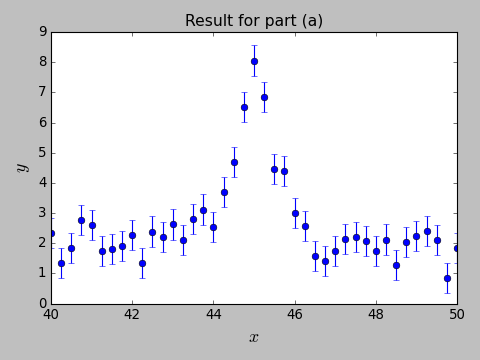

In [5]:
plt.figure()
plt.errorbar(x, y, u, fmt='o')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Result for part (a)");

### Part (b)

#### Initial estimates for parameters

In [6]:
a = 6   # Height of peak above background
b = 45  # Position of peak
c = 0.5 # Half width half maximum  
d = 1.8 # Background
p0 = a, b, c, d

<IPython.core.display.Javascript object>


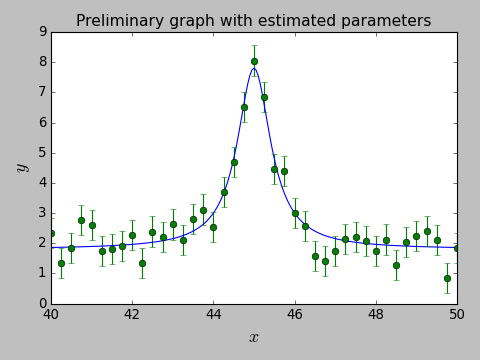

In [7]:
plt.figure()
xc = np.linspace(40,50,201)
yc = s(xc, *p0)
plt.plot(xc, yc)
plt.errorbar(x,y,u,fmt='o')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Preliminary graph with estimated parameters");

#### Perform fit

In [8]:
popt, pcov = optimize.curve_fit(s, x, y, p0, sigma = u, absolute_sigma=True)
a, b, c, d = popt

<IPython.core.display.Javascript object>


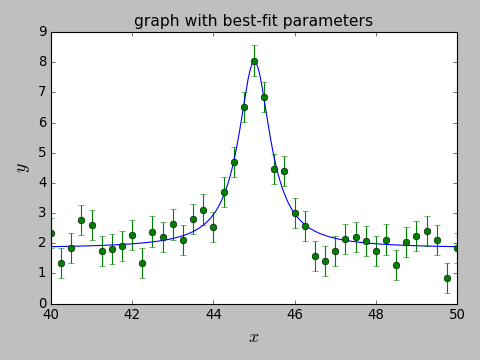

In [9]:
plt.figure()
xc = np.linspace(40,50,201)
yc = s(xc, *popt)
plt.plot(xc, yc)
plt.errorbar(x,y,u,fmt='o')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("graph with best-fit parameters");

### Part (c)

In [10]:
print('a =', a,'+/-', np.sqrt(pcov[0,0]))
print('b =', b,'+/-', np.sqrt(pcov[1,1]))
print('c =', c,'+/-', np.sqrt(pcov[2,2]))
print('d =', d,'+/-', np.sqrt(pcov[3,3]))

a = 6.202785323481083 +/- 0.40946971434632307
b = 45.00932597963973 +/- 0.03140162164808221
c = 0.4732694284933136 +/- 0.05139611109518547
d = 1.8310278808275626 +/- 0.1056793583959866


#### Formatted results

\begin{eqnarray*}
a &=& 6.2 \pm 0.4\\
b &=& 45.01 \pm 0.03\\
c &=& 0.47 \pm 0.05 \\
d &=& 1.8 \pm 0.1
\end{eqnarray*}

### Part (d)
The fit looks good, but we should really look at the residuals and calculate $\chi^2_\text{min}$.

<IPython.core.display.Javascript object>


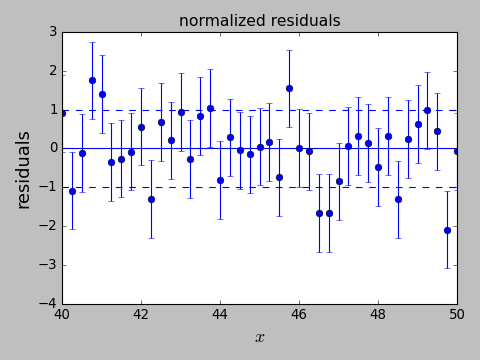

In [11]:
plt.figure()
yr = (y - s(x, *popt))/u
#plt.scatter(x, yr)
plt.errorbar(x,yr,1,fmt='o')
plt.axhline(0)
plt.axhline(1, ls='--')
plt.axhline(-1, ls='--')
plt.xlabel('$x$')
plt.ylabel('residuals')
plt.title("normalized residuals");

In [12]:
print(len(x), chi2(x, y, u, *popt))

41 30.695145262322157


#### Fit seems good: normalized residual mostly in range -1 to 1; $\chi^2$ on the order of the number of data points. The number of degrees of freedom are here 41-5=36,  which is approximately 30.

## Make Contour plots to check correlations in fit parameters

### Part (e): Contour plots for $\chi^2-\chi^2_{\rm min}$ for $a$ and $b$

For $a$ and $b$, I expect a correlation coefficient near zero. The determination of the 
horizontal position of the peak has no bearing on the height of the peak.

<IPython.core.display.Javascript object>


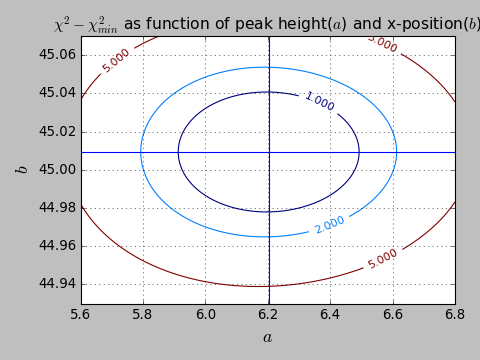

In [13]:
AA = np.linspace(5.6, 6.8, 201)
bb = np.linspace(44.93, 45.07, 201)

Z = np.zeros((len(AA),len(bb)))

for i in range(len(AA)):
    for j in range(len(bb)):
        Z[j,i] = chi2(x, y, u, AA[i], bb[j], c, d) - chi2(x, y, u, *popt)

plt.figure()
AAgrid, bbgrid = np.meshgrid(AA, bb)
CS = plt.contour(AAgrid, bbgrid, Z, levels=[1,2,5])
plt.xlabel('$a$')
plt.ylabel('$b$')
plt.title('$\chi^2 - \chi^2_{min}$ as function of peak height($a$) and x-position($b$)')
plt.grid()
plt.axhline(b)
plt.axvline(a)
plt.clabel(CS, inline=1, fontsize=10);



And the fact that the contours are not tilted with respect to the (x,y) axes confirms that there is no correlation between these parameters. Using the $\chi^2-\chi^2_{min} = 1$ contour, I see that the range in acceptable $a$ values runs from 5.9 to 6.5, so an uncertainty of 0.3 seems reasonable. Likewise, the range in acceptable $b$ values runs from 44.98 to 45.04, so an uncertainty of 0.03 in this parameter seems reasonable. 

### Part (f): Contour plots for $\chi^2-\chi^2_{\rm min}$ for $c$ and $d$

For $c$ and $d$ I expect there to be a nonzero correlation.  A high estimation of the background $d$) 
will clearly be negatively correlated with a low estimation of the signal amplitude ($a$), but it 
will also be negatively correlated with a low estimation of the width at half maximum (determined by $c$),
because the maximum is low.

<IPython.core.display.Javascript object>


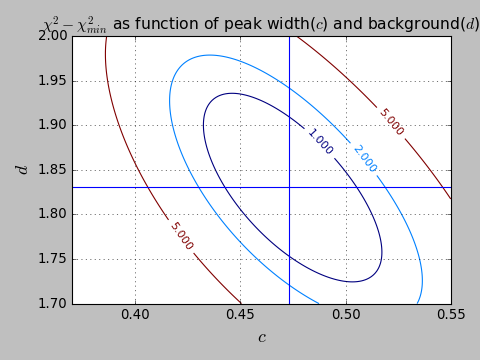

<a list of 4 text.Text objects>

In [14]:
cc = np.linspace(0.37, 0.55, 201)
dd = np.linspace(1.7, 2.0, 201)

Z = np.zeros((len(cc),len(dd)))

for i in range(len(cc)):
    for j in range(len(dd)):
        Z[j,i] = chi2(x, y, u, a, b, cc[i], dd[j]) - chi2(x, y, u, *popt)

plt.figure()
CCgrid, DDgrid = np.meshgrid(cc, dd)
CS = plt.contour(CCgrid, DDgrid, Z, levels=[1,2,5])
plt.xlabel('$c$')
plt.ylabel('$d$')
plt.title('$\chi^2 - \chi^2_{min}$ as function of peak width($c$) and background($d$)')
plt.grid()
plt.axhline(d)
plt.axvline(c)
plt.clabel(CS, inline=1, fontsize=10)

And the fact that the contours <b>are</b> tilted with respect to the (x,y) axes confirms that there is a correlation between these parameters. Using the $\chi^2-\chi^2_{min} = 1$ contour, I see that the range in acceptable $c$ values runs from 0.43 to 0.52, so an uncertainty of 0.05 seems reasonable. Likewise, the range in acceptable $d$ values runs from 1.72 to 1.94, so an uncertainty of 0.09 in this parameter seems reasonable. 

#### Version information
`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

`version_information` is installed on the linux network at Bucknell

In [16]:
%load_ext version_information

In [17]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.8 64bit [GCC 7.5.0]
IPython 7.17.0
OS Linux 3.10.0 1160.36.2.el7.x86_64 x86_64 with centos 7.9.2009 Core
numpy 1.19.1
scipy 1.5.0
matplotlib 3.3.0
Wed Mar 30 10:17:29 2022 EDT